In [343]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2 as cv

## Reading in the images and creating a training dataset with labels

2068
(224, 224, 3)


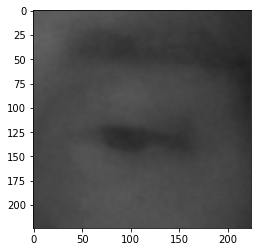

(array([[[91, 91, 91],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       [[91, 91, 91],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       [[90, 90, 90],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [48, 48, 48]],

       ...,

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]],

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [53, 53, 53]],

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [53, 53, 53]]], dtype=uint8), 0)


In [344]:
categories = ["active","drowsy"]
base_path = "D:\MachineLearning_DeepLearning\Computer Vision\Drowsiness Detection using Transfer Learning\Training"
data = []

for index,cat in enumerate(categories):
    cat_path = os.path.join(base_path,cat)
    for file in os.listdir(cat_path):
        img_array = cv.imread(os.path.join(cat_path,file))
        resized_img = cv.resize(img_array, (224,224))
        data.append((resized_img,index))
        
print(len(data))      # 1999 images
print(data[0][0].shape)  # 224x224 RGB image 
plt.imshow(data[0][0])
plt.show()
print(data[0])

## Shuffle the dataset to avoid imbalance

In [345]:
import random
random.shuffle(data)

In [346]:
for i in range(20):
    print(data[i][1])

0
0
1
0
0
1
0
1
0
1
1
1
1
0
0
1
0
1
0
0


## Create X and Y

In [347]:
X = []
Y = []
for img,label in data:
    X.append(img)
    Y.append(label)
print(len(X))
print(len(Y))
print(X[0].shape)

2068
2068
(224, 224, 3)


In [348]:
# Reshape X into a (-1,224,224,3) format
X = np.reshape(X, (-1,224,224,3))
X.shape

(2068, 224, 224, 3)

## Normalize the data and store X and Y as pickle files

In [349]:
X = X/255.0

In [350]:
Y = np.array(Y)

In [351]:
Y.shape

(2068,)

In [352]:
import pickle
pickle.dump(X, open("Train_X.pickle","wb"))
pickle.dump(Y, open("Train_Y.pickle","wb"))

## Build and train the model on a pre-trained CNN architecture(Transfer Learning)

In [353]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet

In [354]:
# Actual MobileNet architecture
mobilenet_base = MobileNet()
mobilenet_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [355]:
# Transfer Learning
base_input = mobilenet_base.layers[0].input   #  1st layer of the mobilenet base in chosen as the input
base_output = mobilenet_base.layers[-4].output  # Last 5th layer of the mobilenet base is chosen as the output

In [356]:
flat_layer = Flatten()(base_output)
dense_layer1 = Dense(128)(flat_layer)
dense_layer2 = Dense(10)(dense_layer1)
dense_layer3 = Dense(1)(dense_layer2)
final_output = Activation("sigmoid")(dense_layer3)

In [357]:
final_model = keras.Model(inputs = base_input, outputs = final_output)
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [358]:
final_model.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.BinaryCrossentropy(), metrics = ["Accuracy"])

In [363]:
# Get the callbacks list
es = EarlyStopping(monitor = "val_loss", patience = 5, verbose = 0)
mc = ModelCheckpoint("best_model.h5", monitor = "val_loss", verbose = 0, save_best_only = True)
callbacks_list = [es,mc]

In [364]:
history = final_model.fit(X, Y, validation_split = 0.15, epochs = 20, batch_size = 32, callbacks = callbacks_list)

Epoch 1/20
55/55 [==============================] - 109s 2s/step - loss: 0.2375 - Accuracy: 0.9414 - val_loss: 5.9162 - val_Accuracy: 0.5338
Epoch 2/20
55/55 [==============================] - 108s 2s/step - loss: 0.0635 - Accuracy: 0.9767 - val_loss: 0.4166 - val_Accuracy: 0.8489
Epoch 3/20
55/55 [==============================] - 113s 2s/step - loss: 0.0346 - Accuracy: 0.9886 - val_loss: 0.2264 - val_Accuracy: 0.9228
Epoch 4/20
55/55 [==============================] - 127s 2s/step - loss: 0.0339 - Accuracy: 0.9880 - val_loss: 0.2119 - val_Accuracy: 0.9518
Epoch 5/20
55/55 [==============================] - 128s 2s/step - loss: 0.0316 - Accuracy: 0.9892 - val_loss: 0.1256 - val_Accuracy: 0.9421
Epoch 6/20
55/55 [==============================] - 111s 2s/step - loss: 0.0326 - Accuracy: 0.9869 - val_loss: 0.1999 - val_Accuracy: 0.9389
Epoch 7/20
55/55 [==============================] - 115s 2s/step - loss: 0.0243 - Accuracy: 0.9903 - val_loss: 0.1591 - val_Accuracy: 0.9486
Epoch 8/20
55

In [365]:
history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

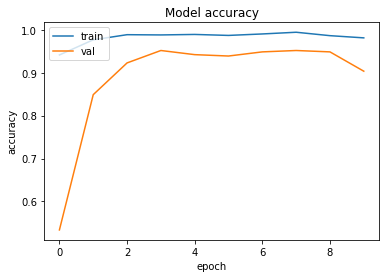

In [366]:
plt.plot(history.history["Accuracy"])
plt.plot(history.history["val_Accuracy"])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [367]:
best_model = keras.models.load_model("best_model.h5")

In [368]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

## Predict for a random image

In [648]:
input_file = "D:\MachineLearning_DeepLearning\Computer Vision\Drowsiness Detection using Transfer Learning\Testing\download4.jpeg"

In [649]:
face_classifier = cv.CascadeClassifier("lbp_frontal_face_cascade.xml")
eye_classifier = cv.CascadeClassifier("haar_eye_cascade.xml")
eyeglass_classifier = cv.CascadeClassifier("haar_eye_glasses_cascade.xml")
profface_classifier = cv.CascadeClassifier("lbp_profile_face_cascade.xml")

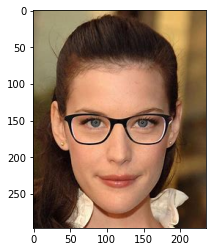

In [650]:
img_arr = cv.imread(input_file)
img_arr = cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
plt.imshow(img_arr)
plt.show()

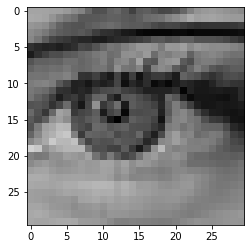

In [655]:
gray = cv.cvtColor(img_arr,cv.COLOR_RGB2GRAY)
# facebox = face_classifier.detectMultiScale(gray, 1.1,3)
final_roi = []

eyesbox = eye_classifier.detectMultiScale(gray, 1.1, 5)
for (x1,y1,w1,h1) in eyesbox:
    eyes = gray[y1:y1+h1,x1:x1+w1]
    eyes = cv.cvtColor(eyes, cv.COLOR_GRAY2RGB)
    plt.imshow(eyes)
    plt.show()
    break
        
# eyesbox1 = eyeglass_classifier.detectMultiScale(gray, 1.1, 5)
# for (x1,y1,w1,h1) in eyesbox1:
#     eyes1 = gray[y1:y1+h1,x1:x1+w1]
#     eyes1 = cv.cvtColor(eyes1, cv.COLOR_GRAY2RGB)
#     plt.imshow(eyes1)
#     plt.show()
#     break
    
if len(eyesbox) == 0:
    print("No eyes detected!")

In [656]:
eyes.shape

(30, 30, 3)

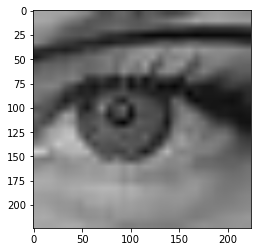

(1, 224, 224, 3)

In [657]:
final_img = cv.resize(eyes, (224,224))
plt.imshow(final_img)
plt.show()
final_img = np.expand_dims(final_img, axis = 0)
final_img = final_img/255.0
final_img.shape

In [658]:
best_model.predict(final_img)

1/1 [==============================] - 0s 42ms/step


array([[0.00438212]], dtype=float32)